## First tests in getting data from Jira

In [33]:
from jira import JIRA
from osbot_jira.api.jira_server.API_Jira import API_Jira

api_jira = API_Jira()
api_jira._jira = JIRA(server='https://ubuntu-policy.atlassian.net/')

from IPython.display        import display_html, HTML, Javascript,display
from osbot_aws.apis.Lambda import Lambda
def maps_create(code, height= 300):
    aws_lambda = Lambda('osbot_browser.lambdas.lambda_browser')
    params = ["maps", "exec_js"]
    params.extend(code.split(' '))

    payload = {"params": params,
               'data': {}}
    png_data = aws_lambda.invoke(payload)
    show_png(png_data, height)
#    return png_data

#maps_create(map)
def show_png(png_data,height=200):
    html = '<img style="_width:100%;height:{0}px;border:1px solid black" align="left" src="data:image/png;base64,{1}"/>'.format(height,png_data)
    display_html(html, raw=True)      
    

In [20]:
map_code = """
add("wizard in action", 1, 1)

add("cast a spell", 1, 3.1) 

link("wizard in action", "cast a spell")
"""
#maps_create(map_code)


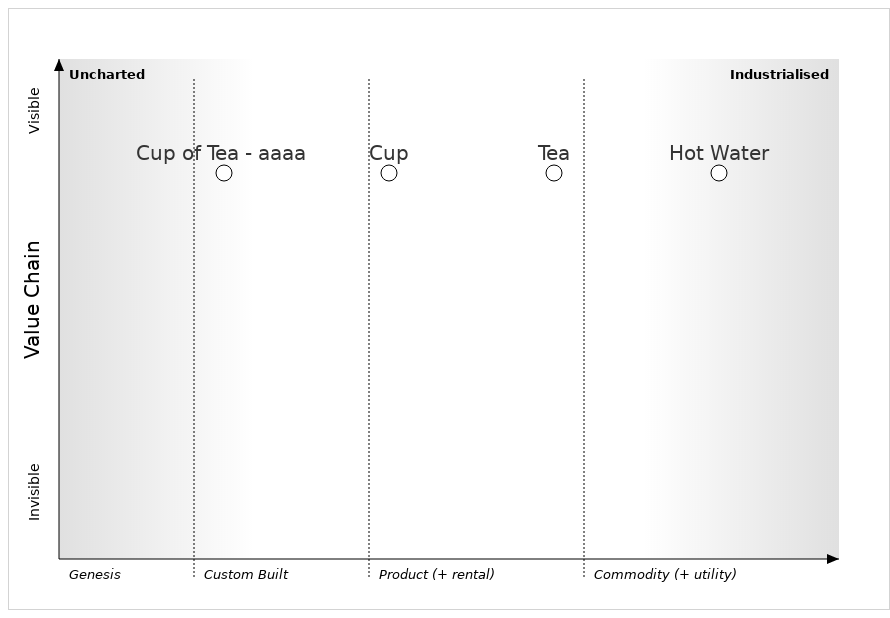

'add("Cup of Tea - aaaa ", 1, 2)\nadd("Cup", 2, 2)\nadd("Tea", 3, 2)\nadd("Hot Water", 4, 2)\n'

In [1]:
from IPython.display        import display_html, HTML, Javascript,display
from osbot_aws.apis.Lambda import Lambda
from jira import JIRA
from osbot_jira.api.jira_server.API_Jira import API_Jira


class Wardley_Map:
    def __init__(self):
        self.depth    = 2
        self.map_code = ""
                    
    def maps_create(self, code, height= 300):
        aws_lambda = Lambda('osbot_browser.lambdas.lambda_browser')
        params = ["maps", "exec_js"]
        params.extend(code.split(' '))

        payload = {"params": params,
                   'data': {}}
        png_data = aws_lambda.invoke(payload)
        self.show_png(png_data, height)
    #    return png_data

    def show_png(self, png_data,height=200):
        html = '<img style="_width:100%;height:{0}px;border:1px solid black" align="left" src="data:image/png;base64,{1}"/>'.format(height,png_data)
        display_html(html, raw=True)      


    def add_node(self, summary, evolution):
        self.map_code += 'add("{0}", {1}, {2})\n'.format(summary, self.resolve_evolution(evolution), self.depth)

    def show_map(self):
        self.maps_create(self.map_code)

    def resolve_evolution(self,evolution):
        mapping = { 'Genesis' : 1 , 'Custom Built': 2 , 'Product': 3, 'Commodity': 4}
        return mapping[evolution]



class Jira_Map:        
    def __init__(self, root_id):
        self.root_id        = root_id
        self.api_jira       = API_Jira()
        self.wmap           = Wardley_Map()        
        self.api_jira._jira = JIRA(server='https://ubuntu-policy.atlassian.net/')

    def add_node(self,issue_id):
        issue = self.api_jira.issue(issue_id)
        summary = issue['Summary']        
        self.wmap.add_node(issue['Summary'], issue['Status'])
        
    def create(self):        
        self.add_node(self.root_id)
        return self
    
    def show(self):
        self.wmap.show_map()

jira_map = Jira_Map('Map-1') 
#jira_map.create().show()
jira_map.add_node('Map-1')
jira_map.add_node('Map-2')
jira_map.add_node('Map-3')
jira_map.add_node('Map-4')
jira_map.show()               
jira_map.wmap.map_code


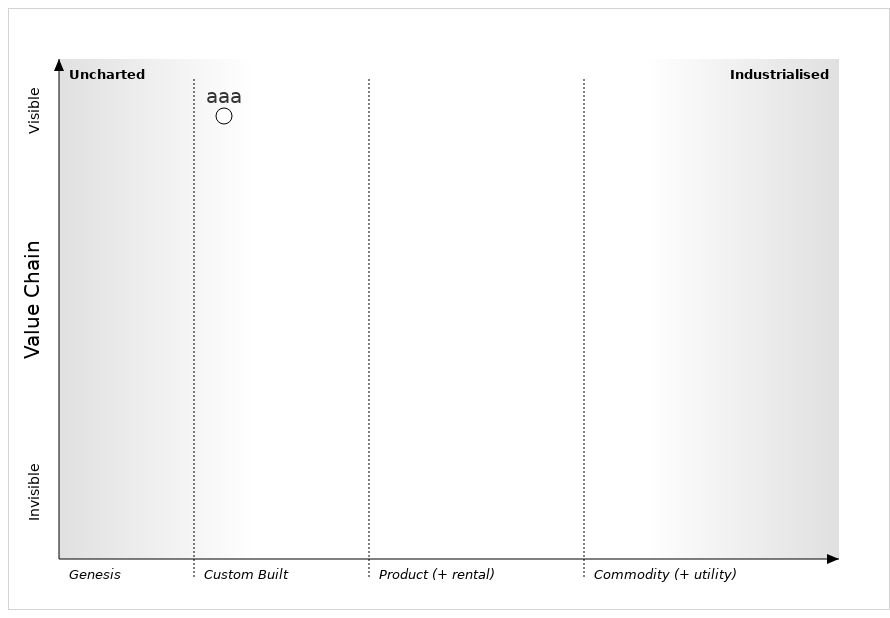


//add("Cup of Tea - aaaa ", 1, 2)
//add("Cup", 2, 2)
//add("Tea", 3, 2)
//add("Hot Water", 4, 2)
window.maps.add_component('aaa',1,1)



In [8]:
map_code = """
//add("Cup of Tea - aaaa ", 1, 2)
//add("Cup", 2, 2)
//add("Tea", 3, 2)
//add("Hot Water", 4, 2)
window.maps.add_component('aaa',1,1)

"""
jira_map.show()

In [5]:
issue = jira_map.api_jira.issue(jira_map.root_id)
resolve_evolution(issue.get('Status'))

NameError: name 'resolve_evolution' is not defined

In [2]:
jira_map.wmap.map_code

NameError: name 'jira_map' is not defined

In [40]:
jira_map.wmap.resolve_evolution('Genesis')
jira_map.wmap.resolve_evolution('Product')

2